# Tutorial for the atomic crystal module in PyXtal
Source code: https://github.com/qzhu2017/PyXtal

Created by Qiang Zhu (2020/11/25)

An interactive webpage can be found at the following [link](https://vxrd.physics.unlv.edu)


In [1]:
# load the necessary libraries

from pyxtal import pyxtal
from pyxtal.XRD import Similarity
from pkg_resources import resource_filename

In [2]:
# specify the path of an experimental structure
cif_nacl = resource_filename("pyxtal", "database/cifs/NaCl.cif")
cif_aspirin = resource_filename("pyxtal", "database/cifs/aspirin.cif")

# load the structure from pyxtal

# if you load the atomic crystal
#xtal1 = pyxtal()
#xtal1.from_seed(seed = cif_nacl)    

# to load a molecular crystal, also needs to specify the molecule tag
xtal1 = pyxtal(molecular=True)
xtal1.from_seed(seed=cif_aspirin, molecule='aspirin')
print(xtal1)

# visualize the structure
# xtal1.show()

------Crystal from Seed------
Dimension: 3
Composition: [H8 C9 O4]4
Group: P21/c (14)
monoclinic lattice:  11.2330   6.5440  11.2310  90.0000  95.8900  90.0000
Wyckoff sites:
	H8C9O4 @ [0.2414 0.5782 0.0168]  WP:  4e, Site symmetry 1 ==> Euler:  0.000  0.000  0.000


In [3]:
# compute the xrd project
xrd = xtal1.get_XRD(thetas=[0, 35])

# you can easily access the diffraction information by hkl indices
print(xrd)

  2theta     d_hkl     hkl       Intensity  Multi
   7.912    11.174   [ 1  0  0]    43.69        2
  15.693     5.647   [ 1  1  0]    11.94        4
  15.694     5.647   [ 0  1  1]    13.85        4
  15.863     5.587   [ 2  0  0]    15.35        2
  15.866     5.586   [ 0  0  2]   100.00        2
  17.002     5.215   [ 1  0 -2]     6.52        2
  17.224     5.148   [ 1  1 -1]     1.15        4
  17.965     4.938   [ 1  1  1]     2.18        4
  18.472     4.803   [ 1  0  2]     1.69        2
  20.907     4.249   [ 2  1  0]     8.59        4
  20.909     4.249   [ 0  1  2]    22.40        4
  21.308     4.170   [ 2  0 -2]     6.03        2
  21.791     4.079   [ 2  1 -1]     6.94        4
  21.792     4.078   [ 1  1 -2]     1.73        4
  22.967     3.872   [ 2  1  1]    49.23        4
  22.968     3.872   [ 1  1  2]    46.39        4
  23.651     3.762   [ 2  0  2]    17.19        2
  23.891     3.725   [ 3  0  0]     2.41        2
  25.327     3.517   [ 2  1 -2]     4.51        4


In [4]:
# Now we randomly perturb the crystal
xtal2 = xtal1.copy()
xtal2.apply_perturbation(d_lat=0.02)
xrd2 = xtal2.get_XRD(thetas=[0, 35])

The similarity between two PXRDs is 0.9483


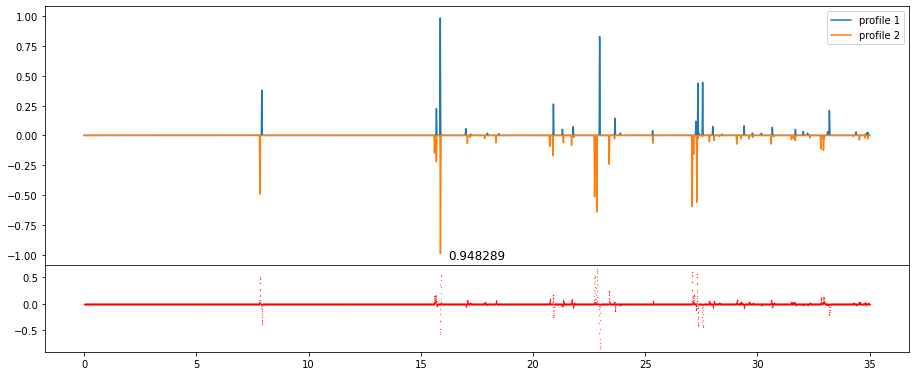

In [5]:
# Compare the the PXRDs of two structures
p1 = xrd.get_profile()
p2 = xrd2.get_profile()
s = Similarity(p1, p2, x_range=[0,35])
print(s)
s.show()

In [6]:
print(xtal1)
print(xtal2)

------Crystal from Seed------
Dimension: 3
Composition: [H8 C9 O4]4
Group: P21/c (14)
monoclinic lattice:  11.2330   6.5440  11.2310  90.0000  95.8900  90.0000
Wyckoff sites:
	H8C9O4 @ [0.2414 0.5782 0.0168]  WP:  4e, Site symmetry 1 ==> Euler:  0.000  0.000  0.000
------Crystal from Perturbation------
Dimension: 3
Composition: [H8 C9 O4]4
Group: P21/c (14)
monoclinic lattice:  11.3414   6.5678  11.2109  90.0000  95.1484  90.0000
Wyckoff sites:
	H8C9O4 @ [0.2384 0.5761 0.0196]  WP:  4e, Site symmetry 1 ==> Euler:  0.134  0.787  0.603


In [7]:
xtal1.show()
# xtal2.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol